In [1]:
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# from tqdm import tqdm
# from pytimeparse.timeparse import timeparse

In [17]:
# import numpy as np
# import pandas as pd
# import tempfile
# import os
# import os.path
# import wave
# from IPython.display import Audio, display
# import matplotlib.pylab as plt
# from scipy import stats
import librosa
# from pathlib import Path
# from pydub import AudioSegment
# import seaborn as sns
# import matplotlib.pyplot as plt
# from datetime import datetime

In [1]:
# from python_speech_features import mfcc, logfbank
# import librosa
# import audio_processing as ap
from audio_processing import processing
import numpy as np
import pandas as pd
from tqdm import tqdm
# from pytimeparse.timeparse import timeparse
# from pydub import AudioSegment
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pickle
# from datetime import datetime, timedelta

In [19]:
import importlib

In [20]:
importlib.reload(processing)

<module 'audio_processing.processing' from 'X:\\2 SCIENCE\\PROJECTS\\birdify\\audio_processing\\processing\\__init__.py'>

Resampling to 22050Hz frequency

In [2]:
processing.resample_dir('./mp3', './resampled', sr=22050)

'2150 files from ./mp3 resampled into ./resampled'

In [4]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.io import wavfile
from tempfile import mktemp

In [26]:
song = AudioSegment.from_mp3(r'./test/Turdus-philomelos-240109.mp3')

In [24]:
song = AudioSegment.from_mp3(r'./test/Turdus-philomelos-240109.mp3')
samples = np.array(song.get_array_of_samples(), dtype=float).reshape(-1, song.channels)
# .reshape(-1, track.channels)

# samples = song.get_array_of_samples()
# samples = np.array(samples, dtype=float)

# signal, _ = librosa.load(r'./test/Turdus-philomelos-240109.mp3', sr=22050)

WINDOW_SIZE = 512
y = librosa.stft(samples, hop_length=512, n_fft = WINDOW_SIZE)

y = np.log1p(np.abs(y[:,:1000]))
print(y.shape)

plt.figure(figsize=(20,20))
plt.imshow(y)
plt.show()

ParameterError: Invalid shape for monophonic audio: ndim=2, shape=(2827055, 2)

In [3]:
data = pd.read_csv(r'metadata.csv')
data['Name'] = data.Genus +' '+ data.Specific_epithet

def timedeltas(x):
    t = datetime.strptime(x, '%M:%S').time()
    return timedelta(minutes=t.minute, seconds=t.second)

data['duration'] = data['Length'].apply(lambda x: timedeltas(x).total_seconds())

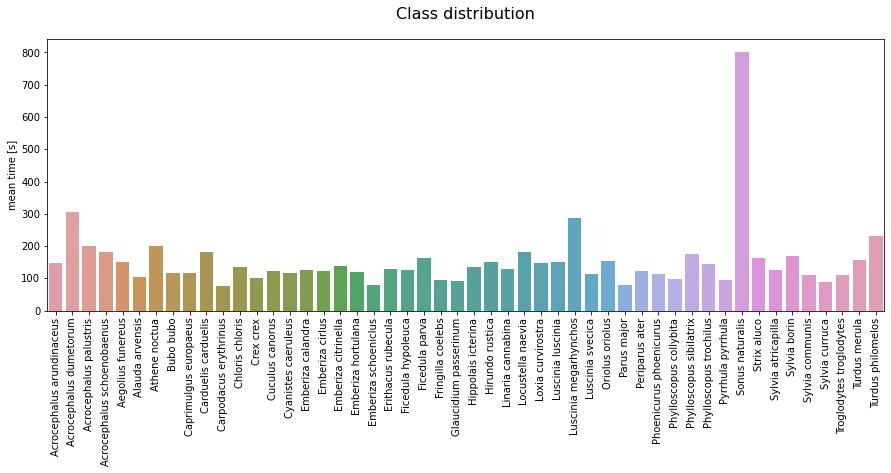

In [4]:
plotting = data.groupby(['Name'])['duration'].mean()
plt.figure(figsize=(15,5))
sns.barplot(x=plotting.index, y=plotting.values, saturation=0.6)
plt.xticks(rotation = 90)
plt.xlabel(None)
plt.ylabel('mean time [s]')
plt.title('Class distribution', fontdict={'size':16}, y=1.05)
plt.show()

In [29]:
# data[['sample_rate', 'num_samples']] = add_sample_info(data, 'Path', dur=False)

# with open('dataset.pkl', 'wb') as f:
#     pickle.dump(data, f)

with open('dataset.pkl', 'rb') as f:
    data = pickle.load(f)

classes = data.Name.unique()

signals = {}
fft = {}
fbank = {}
mfccs = {}

for c in classes[0:4]:
    ix = data[data.Name == c].index[-1]
    f = data.loc[ix].Path
    fs = data.loc[ix].sample_rate
    signal, rate = librosa.load(f, sr=fs)
    signals[c] = signal
    fft[c] = fft_calc(signal, rate)

C:\Users\antos\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [30]:
sample_plot = ap.exploration.Visualize(signal=signals, fft=fft)

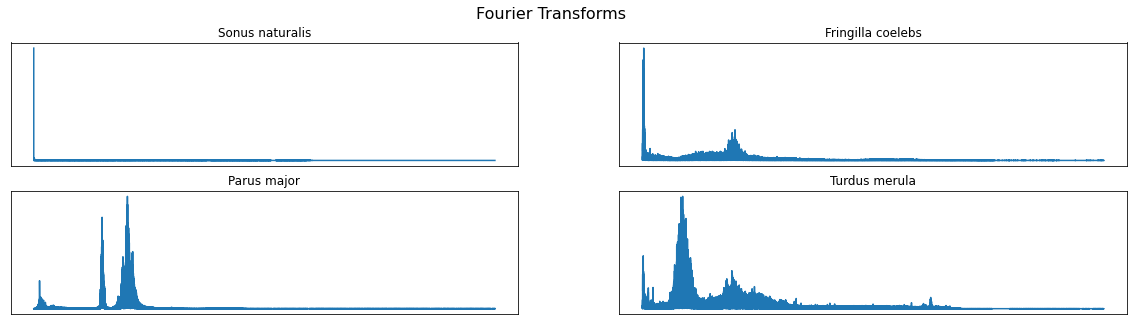

In [32]:
sample_plot.fft_plot()

In [241]:
from python_speech_features import mfcc, logfbank

In [249]:
# signals = {}
# fft = {}
# fbank = {}
# mfccs = {}

# for c in class_names:
#     mp3_file = data[data.Name == c].iloc[0,0]
#     song = AudioSegment.from_mp3(file)
#     fs = song.frame_rate
#     signal, _ = librosa.load(file, sr=fs)
#     signals[c] = signal
#     fft[c] = calc_fft(signal, fs)
    
#     bank = logfbank(signal[:fs], fs, nfilt=128, nfft=1200).T
#     fbank[c] = bank
#     mel = mfcc(signal[:fs], fs, numcep=64, nfilt=128, nfft=1200).T
#     mfccs[c] = mel

In [66]:
import os

In [46]:
from pydub import AudioSegment

In [61]:
song = AudioSegment.from_mp3(r'./Sonus-naturalis-156938.mp3')
samples = song.get_array_of_samples()
samples = np.array(samples, dtype=float)

In [62]:
samples = song.get_array_of_samples()

In [63]:
samples = np.array(samples, dtype=float)

C:\Users\antos\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


371 ms ± 6.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


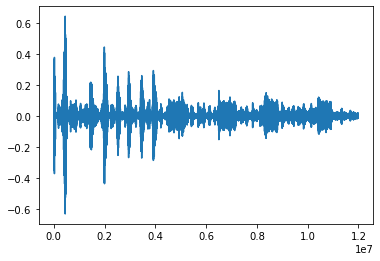

In [45]:
file = r'./Sonus-naturalis-156938.mp3'
song = AudioSegment.from_mp3(file)
fs = song.frame_rate

signal, _ = librosa.load(file, sr=fs)
plt.plot(signal)
plt.show()

In [5]:
import sox

In [16]:
cbn = sox.Transformer()
cbn.convert(samplerate=22050, n_channels=1)
cbn.build(
    input_filepath = './mp3/Sonus-naturalis-156938.mp3', output_filepath = 'Sonus-naturalis-156938.mp3'
)

True

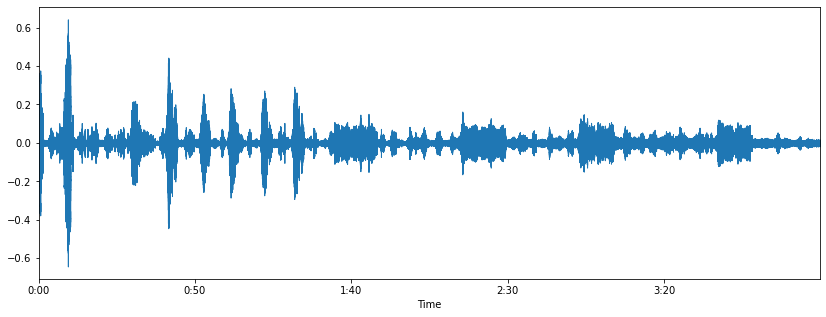

In [19]:
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(signal, sr=fs)
plt.show()

In [92]:
# import IPython.display as ipd
# ipd.Audio(x, rate=fs)

(257, 1000)


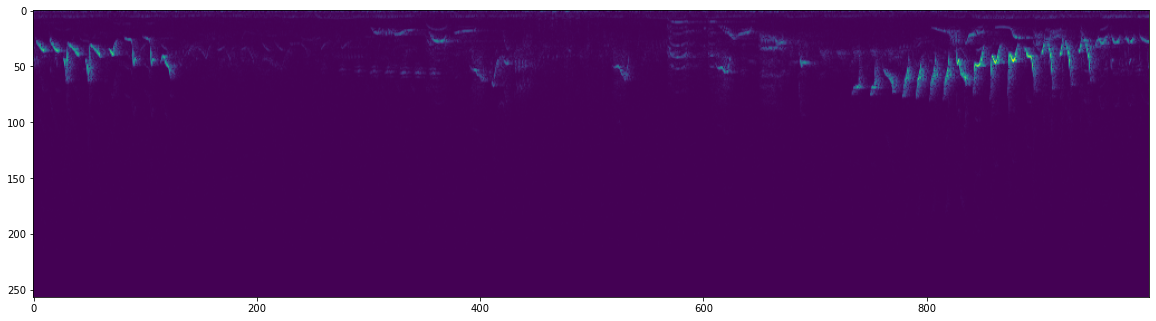

In [65]:
WINDOW_SIZE = 512
y = librosa.stft(signal, hop_length=512, n_fft = WINDOW_SIZE)#, hop_length = 512)
# y = librosa.feature.melspectrogram(x, sr=44100, n_fft=WINDOW_SIZE, hop_length=WINDOW_SIZE)

y = np.log1p(np.abs(y[:,:1000]))
print(y.shape)

plt.figure(figsize=(20,20))
plt.imshow(y)
plt.show()

(257, 500)


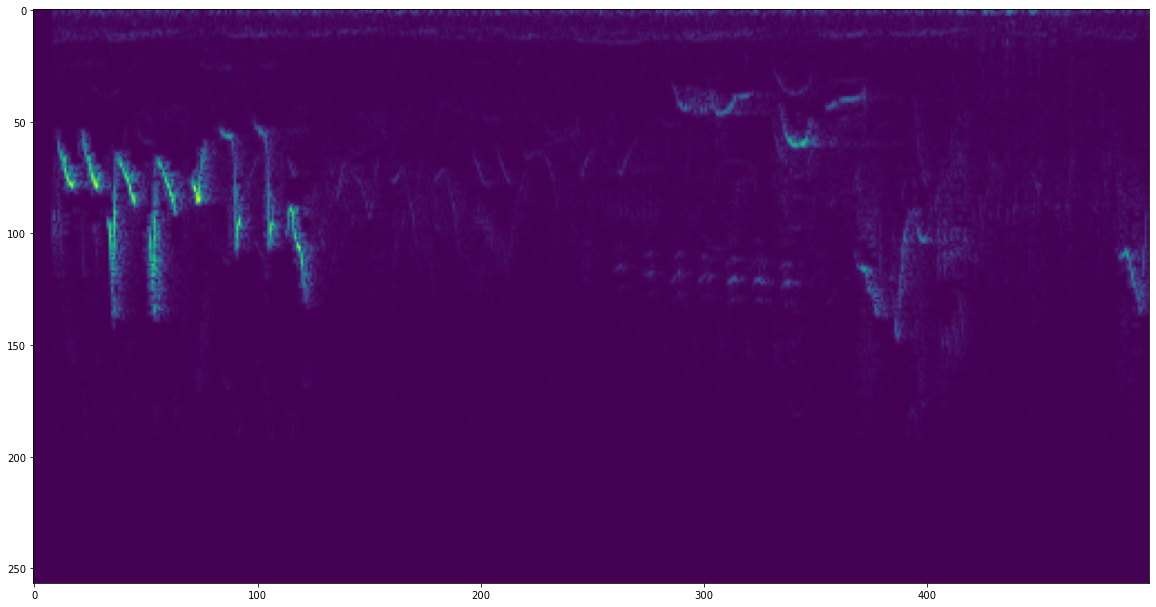

In [41]:
WINDOW_SIZE = 512
y = librosa.stft(signal, hop_length=256, n_fft = WINDOW_SIZE)#, hop_length = 512)
# y = librosa.feature.melspectrogram(x, sr=44100, n_fft=WINDOW_SIZE, hop_length=WINDOW_SIZE)

y = np.log1p(np.abs(y[:,:500]))
print(y.shape)

plt.figure(figsize=(20,20))
plt.imshow(y)
plt.show()